Calculated Wind Parameter A: 6.11e+11 g/cm


C:\Users\paisa\AppData\Local\Temp\ipykernel_2352\101959838.py:77: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(t_snow_days, P_snow, 'r-', lw=2, label='Snowplow Phase',ls='--')


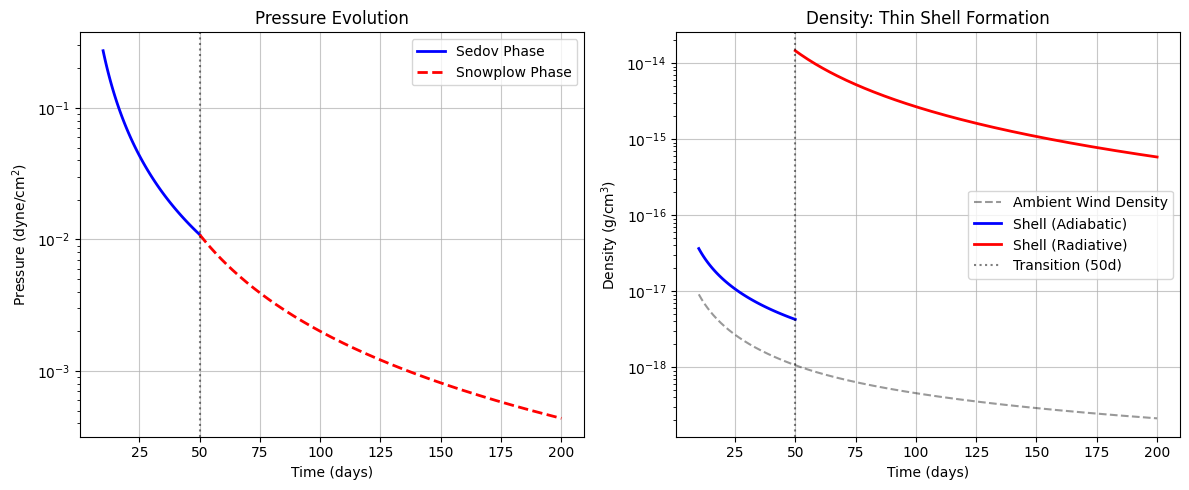

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#1. System Parameters 
# Using user's specific values for a Nova-like system
M_ej = 1.0e-6 * 1.989e33   # Ejecta Mass (10^-6 Solar Masses in grams)
v_ej = 3000 * 1e5          # Ejecta Velocity (3,000 km/s in cm/s)
t_dec_days = 10            # End of free expansion (Days)
t_c_days = 50              # Transition to Snowplow (Days)

# Convert times to seconds
t_dec = t_dec_days * 86400
t_c = t_c_days * 86400

# Calculate Radius at deceleration (R = v * t)
R_dec = v_ej * t_dec

# Calculate A (Wind parameter: rho = A * r^-2)
# Condition: Swept mass at t_dec equals ejecta mass (M_sw = 4*pi*A*R)
A = M_ej / (4 * np.pi * R_dec)

print(f"Calculated Wind Parameter A: {A:.2e} g/cm")

#2. Time Arrays
# Phase II (Sedov): From day 10 to day 50
t_sedov_days = np.linspace(t_dec_days, t_c_days, 100)
t_sedov = t_sedov_days * 86400

# Phase III (Snowplow): From day 50 onwards (e.g., to 200 days)
t_snow_days = np.linspace(t_c_days, 200, 200)
t_snow = t_snow_days * 86400

#3. Phase II: Sedov Evolution (Adiabatic) ---
# R proportional to t^(2/3) normalized to match R_dec at t_dec
R_sedov = R_dec * (t_sedov / t_dec)**(2/3)
v_sedov = (2/3) * (R_sedov / t_sedov)

# Ambient Density (Wind: rho = A / r^2)
rho_amb_sedov = A / R_sedov**2

# Shell Density (Strong Shock Adiabatic Limit -> 4 * rho_amb)
rho_shell_sedov = 4 * rho_amb_sedov

# Pressure (P ~ 0.75 * rho_amb * v^2)
P_sedov = 0.75 * rho_amb_sedov * v_sedov**2


# --- 4. Phase III: Snowplow Evolution (Radiative) ---
# Calculate conditions at transition time t_c
R_tc = R_sedov[-1]
v_tc = v_sedov[-1]

# Evolution formulas derived in text
dt = t_snow - t_c
term = 1 + (2 * v_tc / R_tc) * dt

R_snow = R_tc * term**(0.5)
v_snow = v_tc * term**(-0.5)

rho_amb_snow = A / R_snow**2
P_snow = 0.75 * rho_amb_snow * v_snow**2  # Pressure still driven by ram pressure

# Shell Density (The "Thin Shell" Jump)
# The shell cools to roughly 10,000 K (typical floor for atomic cooling)
# We estimate the sound speed in the cold shell (c_s ~ 10 km/s typical)
c_s_cold = 10e5 # 10 km/s in cm/s
Mach = v_snow / c_s_cold
compression = Mach**2  # Isothermal shock compression

rho_shell_snow = compression * rho_amb_snow

# --- 5. Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Pressure
ax1.plot(t_sedov_days, P_sedov, 'b-', lw=2, label='Sedov Phase')
ax1.plot(t_snow_days, P_snow, 'r-', lw=2, label='Snowplow Phase',ls='--')
ax1.axvline(x=t_c_days, color='k', linestyle=':', alpha=0.5)
ax1.set_yscale('log')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Pressure (dyne/cm$^2$)')
ax1.set_title('Pressure Evolution')
ax1.grid(True, alpha=0.7)
ax1.legend()

# Plot Density
# Plotting Ambient Density reference
ax2.plot(np.concatenate([t_sedov_days, t_snow_days]), 
         np.concatenate([rho_amb_sedov, rho_amb_snow]), 
         'k--', alpha=0.4, label='Ambient Wind Density')

ax2.plot(t_sedov_days, rho_shell_sedov, 'b-', lw=2, label='Shell (Adiabatic)')
ax2.plot(t_snow_days, rho_shell_snow, 'r-', lw=2, label='Shell (Radiative)')

ax2.axvline(x=t_c_days, color='k', linestyle=':', alpha=0.5, label=f'Transition ({t_c_days}d)')
ax2.set_yscale('log')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Density (g/cm$^3$)')
ax2.set_title('Density: Thin Shell Formation')
ax2.grid(True, alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.show()